In this assignment students have to compress racoon grey scale image into
5 clusters. In the end, visualize both raw and compressed image and look
for quality difference.

The raw image is available in spicy.misc package with the name face.



In [69]:
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
from skimage import io
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

(768, 1024)


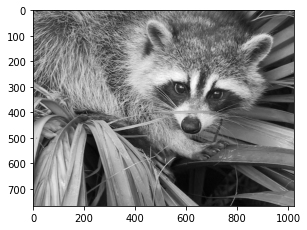

In [68]:

# Visualize the gray scale image

img = scipy.misc.face(gray=True)
print(img.shape)
plt.figure(figsize=(10, 3.6))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()


In [70]:
#Flatten the image

rows=img.shape[0]
cols=img.shape[1]
image = img.reshape(rows*cols, 1)

#clustering
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:

#Replace each pixel value with its nearby centroid
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

In [76]:
compressed_image

array([[113],
       [113],
       [151],
       ...,
       [151],
       [151],
       [151]], dtype=uint8)

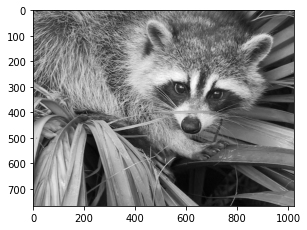

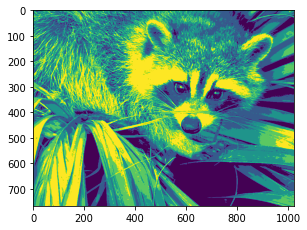

In [77]:
#reshaping to original shape
compressed_image = compressed_image.reshape(rows, cols)

#visualising
plt.figure(figsize=(10, 3.6))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()
plt.figure(figsize=(10, 3.6))
plt.imshow(compressed_image)
plt.show()